# Histopathologic Cancer Detection

In [64]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import tensorflow as tf
import pandas
import os
import cv2
import random
import matplotlib.patches as patches

In [2]:
TRAIN_PATH = "./dataset/train/"
TEST_PATH = "./dataset/test/"

In [3]:
df = pandas.read_csv("./dataset/train_labels.csv")
df.head(3)

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0


### Check if null
We should make sure that there are no `null` fields in the dataset.
If there were any:
* Remove data row
* Fill according to other data (Which can not be done here, as the data are images)

In [4]:
number_of_empty_id_rows = len(df[df.id.isnull()])
number_of_empty_label_rows = len(df[df.label.isnull()])

if number_of_empty_id_rows == 0:
    print("[NOTE]: Dataset 'id' column has no 'Null' values. No need to fill/remove rows.")
if number_of_empty_label_rows == 0:
    print("[NOTE]: Dataset 'label' column has no 'Null' values. No need to fill/remove rows.")

[NOTE]: Dataset 'id' column has no 'Null' values. No need to fill/remove rows.
[NOTE]: Dataset 'label' column has no 'Null' values. No need to fill/remove rows.


### Understanding dataset

* Sampling positive and negative samples will help us understand the dataset.

In [5]:
positive_tumor_samples = df[df.label == 1]
number_of_posive_tumor_samples = len(positive_tumor_samples)
number_of_posive_tumor_samples
print(f"Number of positive tumor samples: {number_of_posive_tumor_samples}")

Number of positive tumor samples: 89117


In [6]:
negative_tumor_samples = df[df.label == 0]
number_of_negative_tumor_samples = len(negative_tumor_samples)
number_of_negative_tumor_samples
print(f"Number of negative tumor samples: {number_of_negative_tumor_samples}")

Number of negative tumor samples: 130908


## Data Information provided by [Kaggle](https://www.kaggle.com/c/histopathologic-cancer-detection/data)

In this dataset, you are provided with a large number of small pathology images to classify. Files are named with an image id. The `train_labels.csv` file provides the ground truth for the images in the train folder. You are predicting the labels for the images in the test folder. ***A positive label indicates that the center `32x32px` region of a patch contains at least one pixel of tumor tissue.*** Tumor tissue in the outer region of the patch ***does not*** influence the label. This outer region is provided to enable fully-convolutional models that do not use zero-padding, to ensure consistent behavior when applied to a whole-slide image.

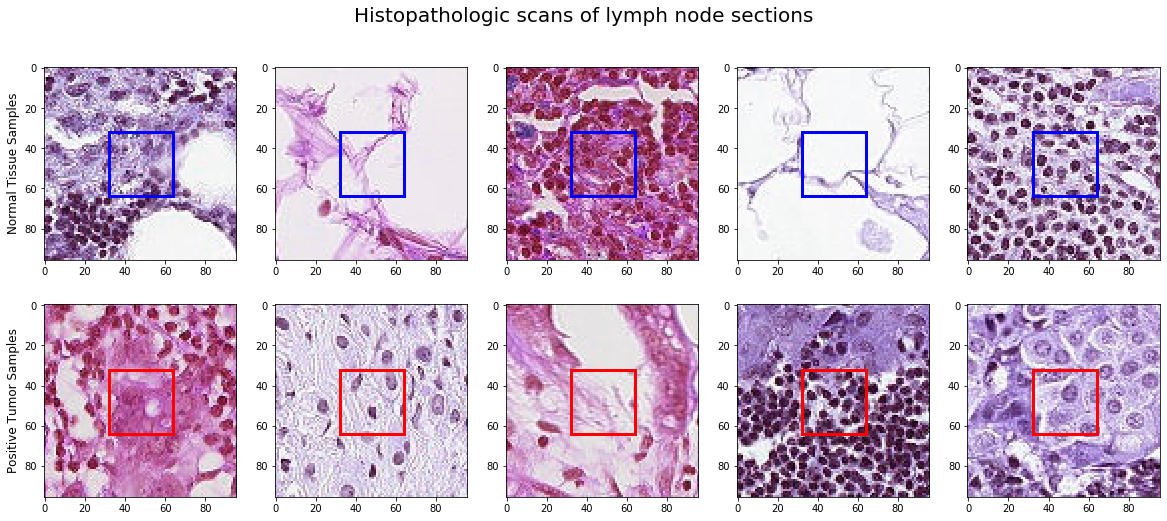

In [66]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

fig.suptitle('Histopathologic scans of lymph node sections',fontsize=20)

ax[0, 0].set_ylabel("Normal Tissue Samples", size='large')
ax[1, 0].set_ylabel("Positive Tumor Samples", size='large')

for i in range(5):
    # Negative Tumor Tissue Sample
    random_negative_sample = negative_tumor_samples.iloc[random.randint(0, number_of_negative_tumor_samples)]
    random_negative_sample_id = random_negative_sample.id
    random_negative_sample_label = random_negative_sample.label
    random_negative_sample_path = os.path.join(TRAIN_PATH, random_negative_sample_id) + '.tif'
    random_negative_img = cv2.imread(random_negative_sample_path)
    rect = patches.Rectangle((32, 32), 32, 32, linewidth=3, edgecolor='b', facecolor='none')
    ax[0, i].add_patch(rect)
    ax[0, i].imshow(random_negative_img)
    
    # Positive Tumor Tissue Samples
    random_positive_sample = positive_tumor_samples.iloc[random.randint(0, number_of_posive_tumor_samples)]
    random_positive_sample_id = random_positive_sample.id
    random_positive_sample_label = random_positive_sample.label
    random_positive_sample_path = os.path.join(TRAIN_PATH, random_positive_sample_id) + '.tif'
    random_positive_img = cv2.imread(random_positive_sample_path)
    rect = patches.Rectangle((32, 32), 32, 32, linewidth=3, edgecolor='r', facecolor='none')
    ax[1, i].imshow(random_positive_img)
    ax[1, i].add_patch(rect)